In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import networkx as nx

In [4]:
tree_of_life = pd.read_csv('data/taxonomy_small.tsv', sep='\t\|\t?', encoding='utf-8', engine='python')

In [5]:
tree_of_life

,uid,parent_uid,name,rank,sourceinfo,uniqname,flags,Unnamed: 7
0,805080,NaN,life,no rank,"silva:0,ncbi:1,worms:1,gbif:0,irmng:0",NaN,NaN,NaN
1,93302,805080.0,cellular organisms,no rank,ncbi:131567,NaN,NaN,NaN
2,996421,93302.0,Archaea,domain,"silva:D37982/#1,ncbi:2157,worms:8,gbif:2,irmng:12",Archaea (domain silva:D37982/#1),NaN,NaN
3,5246114,996421.0,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal,silva:AB302039/#2,NaN,NaN,NaN
4,102415,996421.0,Thaumarchaeota,phylum,"silva:D87348/#2,ncbi:651137,worms:559429,irmng...",NaN,NaN,NaN
5,5246628,102415.0,terrestrial group,no rank - terminal,silva:AB600373/#3,NaN,NaN,NaN
6,4795965,102415.0,Marine Group I,no rank,"silva:D87348/#3,ncbi:905826",NaN,NaN,NaN
7,5205649,4795965.0,uncultured marine crenarchaeote 'Gulf of Maine',species,"silva:AGBE01001967,ncbi:1089683",NaN,sibling_higher,NaN
8,5208050,4795965.0,uncultured marine archaeon DCM858,species,"silva:AF121992,ncbi:105567",NaN,sibling_higher,NaN
9,5205092,4795965.0,uncultured marine group I thaumarchaeote,species,"silva:JF715361,ncbi:360837",NaN,sibling_higher,NaN


In [6]:
pd.read_csv?

Signature: pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
Docstring:
Read CSV (comma-separated) file into DataFrame

Also supports optionally iterating or breaking of the file
into chunks.



In [7]:
tree_of_life = tree_of_life.drop(columns=['sourceinfo', 'uniqname', 'flags','Unnamed: 7'])

In [8]:
tree_of_life.head()

,uid,parent_uid,name,rank
0,805080,NaN,life,no rank
1,93302,805080.0,cellular organisms,no rank
2,996421,93302.0,Archaea,domain
3,5246114,996421.0,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,102415,996421.0,Thaumarchaeota,phylum


In [9]:
print(tree_of_life['uid'].dtype, tree_of_life.parent_uid.dtype)

int64 float64


In [10]:
tree_of_life.iloc[0, 2]

'life'

In [11]:
tree_of_life.loc[0, 'name']

'life'

In [12]:
tree_of_life.uid[0] == tree_of_life.parent_uid[1]

True

In [13]:
tree_of_life.sort_values(by='name').head()

,uid,parent_uid,name,rank
297,5246638,102415.0,AB64A-17,no rank - terminal
293,5246632,102415.0,AK31,no rank - terminal
298,5246637,102415.0,AK56,no rank - terminal
202,5246635,102415.0,AK59,no rank - terminal
204,5246636,102415.0,AK8,no rank - terminal


In [14]:
tree_of_life['rank'].unique()

array(['no rank', 'domain', 'no rank - terminal', 'phylum', 'species',
       'order', 'family', 'genus', 'class'], dtype=object)

In [15]:
tree_of_life['name'].unique()

array(['life', 'cellular organisms', 'Archaea',
       'Marine Hydrothermal Vent Group 1(MHVG-1)', 'Thaumarchaeota',
       'terrestrial group', 'Marine Group I',
       "uncultured marine crenarchaeote 'Gulf of Maine'",
       'uncultured marine archaeon DCM858',
       'uncultured marine group I thaumarchaeote',
       'uncultured Nitrosopumilaceae archaeon',
       'uncultured marine archaeon DCM874', 'Cenarchaeales',
       'Cenarchaeaceae', 'Cenarchaeum', 'Thermoplasmatales archaeon Gpl',
       'Cenarchaeum symbiosum A',
       'crenarchaeote symbiont of Axinella sp.',
       'crenarchaeote symbiont of Axinella verrucosa',
       'uncultured Cenarchaeaceae thaumarchaeote',
       'Cenarchaeum symbiosum', 'Cenarchaeum symbiosum B',
       'Cenarchaeum environmental samples',
       'Cenarchaeaceae environmental samples',
       'Cenarchaeales environmental samples',
       'uncultured Cenarchaeales thaumarchaeote',
       'uncultured crenarchaeote ODPB-A18',
       'uncultured cre

In [16]:
tree_of_life[tree_of_life['rank'] == 'species'].head()

,uid,parent_uid,name,rank
7,5205649,4795965.0,uncultured marine crenarchaeote 'Gulf of Maine',species
8,5208050,4795965.0,uncultured marine archaeon DCM858,species
9,5205092,4795965.0,uncultured marine group I thaumarchaeote,species
10,5205072,4795965.0,uncultured Nitrosopumilaceae archaeon,species
11,5208765,4795965.0,uncultured marine archaeon DCM874,species


In [17]:
tree_of_life[tree_of_life['name'] == 'Archaea']

,uid,parent_uid,name,rank
2,996421,93302.0,Archaea,domain


In [18]:
len(tree_of_life[tree_of_life['rank'] == 'species'])

912

In [19]:
tree_of_life['rank'].value_counts()

species               912
no rank - terminal     58
no rank                12
genus                   8
order                   3
family                  3
phylum                  1
domain                  1
class                   1
Name: rank, dtype: int64

In [20]:
nodes = tree_of_life[['uid', 'name', 'rank']]
edges = tree_of_life[['uid', 'parent_uid']]

In [21]:
nodes.reset_index(level=0, inplace=True)
nodes = nodes.rename(columns={'index':'node_idx'})
nodes.head()

,node_idx,uid,name,rank
0,0,805080,life,no rank
1,1,93302,cellular organisms,no rank
2,2,996421,Archaea,domain
3,3,5246114,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,4,102415,Thaumarchaeota,phylum


In [22]:
nodes.head()

,node_idx,uid,name,rank
0,0,805080,life,no rank
1,1,93302,cellular organisms,no rank
2,2,996421,Archaea,domain
3,3,5246114,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,4,102415,Thaumarchaeota,phylum


In [23]:
nodes

,node_idx,uid,name,rank
0,0,805080,life,no rank
1,1,93302,cellular organisms,no rank
2,2,996421,Archaea,domain
3,3,5246114,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,4,102415,Thaumarchaeota,phylum
5,5,5246628,terrestrial group,no rank - terminal
6,6,4795965,Marine Group I,no rank
7,7,5205649,uncultured marine crenarchaeote 'Gulf of Maine',species
8,8,5208050,uncultured marine archaeon DCM858,species
9,9,5205092,uncultured marine group I thaumarchaeote,species


In [24]:
uid2idx = nodes[['node_idx', 'uid']]
uid2idx = uid2idx.set_index('uid')
uid2idx.head()

,node_idx
uid,
805080,0
93302,1
996421,2
5246114,3
102415,4


In [25]:
uid2idx

,node_idx
uid,
805080,0
93302,1
996421,2
5246114,3
102415,4
5246628,5
4795965,6
5205649,7
5208050,8


In [26]:
tree_of_life

,uid,parent_uid,name,rank
0,805080,NaN,life,no rank
1,93302,805080.0,cellular organisms,no rank
2,996421,93302.0,Archaea,domain
3,5246114,996421.0,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,102415,996421.0,Thaumarchaeota,phylum
5,5246628,102415.0,terrestrial group,no rank - terminal
6,4795965,102415.0,Marine Group I,no rank
7,5205649,4795965.0,uncultured marine crenarchaeote 'Gulf of Maine',species
8,5208050,4795965.0,uncultured marine archaeon DCM858,species
9,5205092,4795965.0,uncultured marine group I thaumarchaeote,species


In [27]:
edges.head()

,uid,parent_uid
0,805080,NaN
1,93302,805080.0
2,996421,93302.0
3,5246114,996421.0
4,102415,996421.0


In [28]:
edges = edges.join(uid2idx, on='uid')

In [29]:
edges = edges.join(uid2idx, on='parent_uid', rsuffix='_parent')

In [30]:
pd.join?

Object `pd.join` not found.


In [31]:
edges = edges.drop(columns=['uid', 'parent_uid'])

In [32]:
edges.head()

,node_idx,node_idx_parent
0,0,NaN
1,1,0.0
2,2,1.0
3,3,2.0
4,4,2.0


In [33]:
edges

,node_idx,node_idx_parent
0,0,NaN
1,1,0.0
2,2,1.0
3,3,2.0
4,4,2.0
5,5,4.0
6,6,4.0
7,7,6.0
8,8,6.0
9,9,6.0


In [34]:
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

In [35]:
for idx, row in edges.iterrows():
    if np.isnan(row.node_idx_parent):
        continue
    i, j = int(row.node_idx), int(row.node_idx_parent)
    adjacency[i, j] = 1
    adjacency[j, i] = 1

In [36]:
adjacency[:15, :15]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [37]:
graph = nx.from_numpy_array(adjacency)

In [38]:
node_props = nodes.to_dict()

In [39]:
for key in node_props:
    nx.set_node_attributes(graph, node_props[key], key)

In [40]:
graph.node[1]

{'node_idx': 1, 'uid': 93302, 'name': 'cellular organisms', 'rank': 'no rank'}

/Users/aminmekacher/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


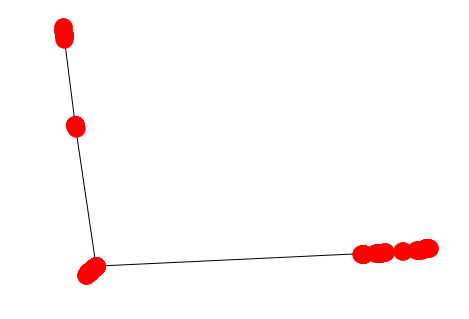

In [41]:
nx.draw_spectral(graph)

/Users/aminmekacher/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


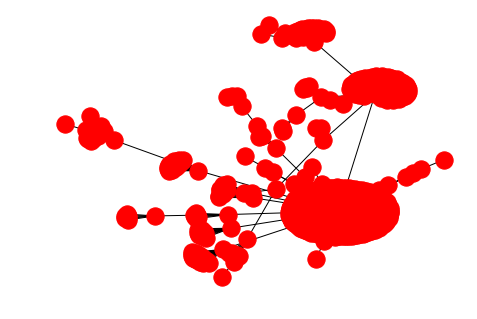

In [42]:
nx.draw_spring(graph)

In [43]:
nx.write_gexf(graph, 'tree_of_life.gexf')

In [44]:
adjacency[:15, :15]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])